#### Assignment 2<br>Jericho McLeod<br>CSS-692

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import csv

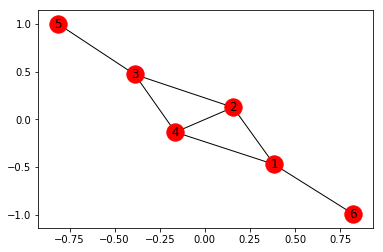

In [48]:
# Creating a sample graph to check functions
G=nx.Graph()
G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_node(4)
G.add_edge(1,2)
G.add_edge(1,4)
G.add_edge(2,4)
G.add_edge(2,3)
G.add_edge(3,4)
G.add_edge(3,5)
G.add_edge(1,6)
nx.draw_networkx(G)

<b>Task 1:</b>
Create a function that takes as input a network of networkx type Graph() and a node i and returns the number of v-shapes visiting node i. You are free to use the degree method.

In [49]:
def count_v_i(G,i):
    k_i = G.degree(i)
    if k_i<2:
        return(0)
    else:
        return(int((k_i * (k_i-1))/2))

count_v_i(G,2)

3

<b>Task 2:</b> Create a function that takes as input a network of networkx type Graph() and a node i and returns the number of triangles visiting node i. You are free to use the degree and neighbors methods.

In [50]:
def count_t_i_original(G,i):
    A = nx.adjacency_matrix(G)
    A_cube  =  (A**3)/2
    
    # The NX adjacency matrix tracks nodes by the index of how they were added.
    # This statement finds the index value of the named node object passed to
    # the function so that the correct triangle count is returned without confusion
    # and regardless of naming convention
    index_i = list(G.nodes()).index(i)
    
    return(int(A_cube[(index_i,index_i)]))

count_t_i_original(G,2)

2

In [52]:
def count_t_i(G,node):
    triangles = 0
    n = list(G.neighbors(node))
    #print(n)
    for i in range(len(n)):
        for j in range(len(n)):
            triangles += G.has_edge(n[i],n[j])
    triangles /=2
    return(int(triangles))
                
count_t_i(G,2)

2

<b>Task 3:</b> Create a function that takes as input a network of networkx type Graph() and a node i and returns the local clustering of i.

In [53]:
def local_cluster(G,i):
    vs = count_v_i(G,i)
    t  = count_t_i(G,i)
    if vs>0:
        return(t/vs)
    else: return(0)

local_cluster(G,2)

0.6666666666666666

<b>Task 4:</b> Copy the function from the lecture notes that generates WS networks (note that what I have provided is the r = 0 case, i.e. no disorder, which we use in this problem). Taking a network of n = 100 and k = 8, use the code above to create:<br><br>


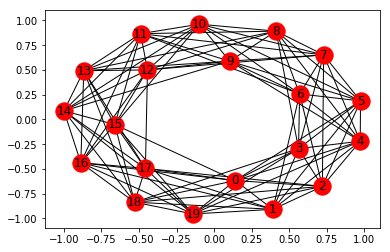

In [75]:
def build_WS(n,k,r):
    hk = int(k/2)
    G  = nx.Graph()
    for i in range(0,n):
        for x in range(1,hk+1):
            j = i + x
            if j >= n:
                j -= n
            G.add_edge(i,j)
    
    # The rest of this is to introduce random rewiring
    # Pass r=0 to function to skip
    '''if r > 0:
        def rand_new(i,n,k):
            h = random.randint(0,n-k)
            if h > i+hk:
                h += hk
            return(h)

        v_g = G.nodes()
        for i in v_g:
            ne = list(G.neighbors(i))
            for j in ne:
                if j>i:
                    if r > random.random():

                        h = i
                        while h == i:
                            h = rand_new(i,n,k)

                        # This isn't the exact mechanism described in classs (no swap)
                        if G.has_edge(i,h) == 0:
                            G.remove_edge(i,j)
                            G.add_edge(i,h)'''
    return(G)

G_trial = build_WS(20,10,0)
nx.draw_networkx(G_trial)

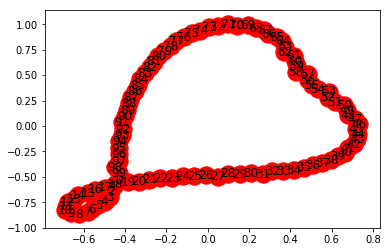

In [58]:
G = build_WS(100,8,0)
nx.draw_networkx(G)

<b>Task 4(a):</b> a list VslistWS of all the local v-shape counts for each and every node in the network

In [59]:
VslistWS  = []
for i in list(G.nodes()):
    VslistWS.append(count_v_i(G,i))
    
print(VslistWS)

[28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28]


<b>Task 4(b)</b> a list TrilistWS of all the local triangle counts for each and every node in the network,


In [60]:
TrilistWS = []
for i in list(G.nodes()):
    TrilistWS.append(count_t_i(G,i))
print(TrilistWS)

[18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18]


<b>Task 4(c)</b> a list clistWS of all the clustering coefficients for each and every node in the network,

In [61]:
clistWS = []
for i in list(G.nodes()):
    clistWS.append(local_cluster(G,i))
    
print(clistWS[0])

0.6428571428571429


<b>Task 4(d)</b> using only a python dictionary and not the histogram function above, create a histogram of the values in VslistWS and describe what you find,


28 100


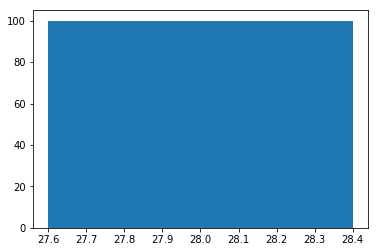

In [76]:
Vs_dict = {}

for i in VslistWS:
    Vs_dict[i] = Vs_dict.get(i,0)+1
    
for k,v in sorted(Vs_dict.items()):
    print(k,v)
    
plt.bar(list(Vs_dict.keys()),list(Vs_dict.values()))
plt.show()

As expected, there is no variation among the nodes in the graph in terms of Vs present: all 100 nodes have 28 Vs. 

<b>Task 4(e)</b> using only a python dictionary and not the histogram function above, create a histogram of the values in TrilistWS and describe what you find,


18 100


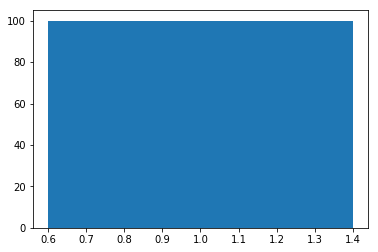

In [63]:
Tri_dict = {}

for i in TrilistWS:
    Tri_dict[i] = Tri_dict.get(i,0)+1
    
for k,v in sorted(Tri_dict.items()):
    print(k,v)

plt.bar(list(Tri_dict.values()),list(Tri_dict.values()))
plt.show()

Similar results as Vs, and for the same reason.

<b>Task 4(f)</b> using the histogram function above, create a histogram of the values in clistWS and describe what you find.


0.6428571428571429 100


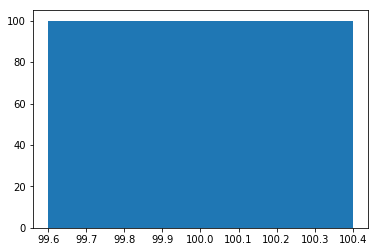

In [77]:
Cl_dict = {}

for i in clistWS:
    Cl_dict[i] = Cl_dict.get(i,0)+1
    
for k,v in sorted(Cl_dict.items()):
    print(k,v)

plt.bar(list(Cl_dict.values()),list(Cl_dict.values()))
plt.show()

Again, all nodes have the same clustering coefficient given there is no rewiring and they were all created the same way.

<b>Task 4(g)</b> (Stop! Do the previous three subitems before this one) Construct three scatter plots, each one pairing two out of the three quantities ki, ti, ci.

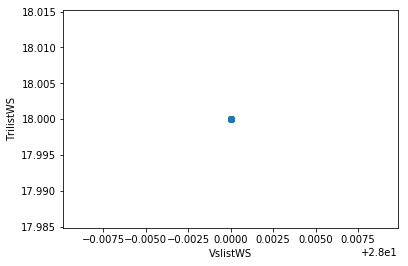

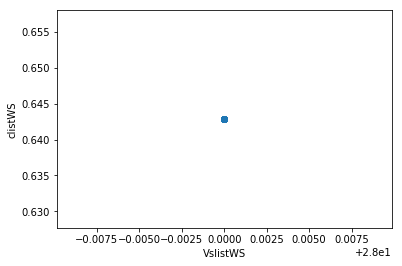

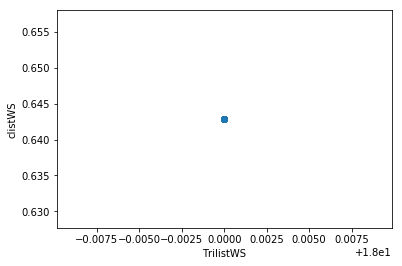

In [78]:
lists = [VslistWS,TrilistWS,clistWS]
list_names = ["VslistWS","TrilistWS","clistWS"]

for i in range(len(lists)):
    for j in range(len(lists)):
        if j>i:
            plt.scatter(lists[i],lists[j])
            plt.xlabel(list_names[i])
            plt.ylabel(list_names[j])
            plt.show()


<b>Task 5:</b> Now, increase k in Prob. 4 in increments of 2 until k = 2⌊(n − 1)/2⌋. Plot as a function of k:<br>
(a) the count of v-shapes for a node,<br>
(b) the count of triangles for a node, and<br>
(c) value of the local clustering of a node.<br>
What is the value of kc? Can you spot it in the plots?

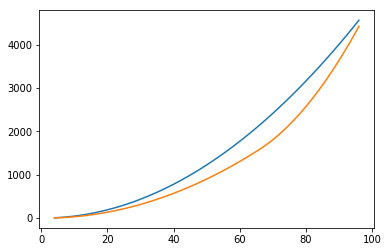

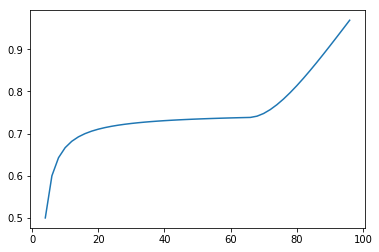

In [19]:
n = 100
#k = 0
r = 0

k_list    = []
VslistWS  = []
TrilistWS = []
clistWS   = []

k_max = 2*int((n-1)/2)

for i in range(2,int(k_max/2)):
    k = i*2
    G = build_WS(n,k,r)
    k_list.append(k)
    VslistWS.append(count_v_i(G,1))
    TrilistWS.append(count_t_i(G,1))
    clistWS.append(local_cluster(G,1))

plt.plot(k_list,VslistWS)
plt.plot(k_list,TrilistWS)
plt.show()
plt.plot(k_list,clistWS)
plt.show()

$k_c$  = Approximately 3/4

<b>Task 6:</b> Using the instructions provided in the lecture notes create two net- works from data, one from the Enron dataset and the other from the condensed matter coauthorship dataset. Download these datasets either from my site (https://sites.google.com/site/edlopez72/ teaching-datasets) or go to https://snap.stanford.edu/data/ (caution: I’ve preprocessed the coauthorship a bit so if you download it from here, you have to check the data for self-loops). You can name the networks as you like. In this assignment, I label the Enron network as E and the coauthorship network as C.<br><br>
<b>Task 7:</b> Repeat Prob. 4 for both E and C, however do not worry about describing your findings in words. Instead, plot all histograms using:<br>
(a) linear scales for both horizontal and vertical axes (hint: you don’t need to the plt.xscale(’log’) statement),<br>
(b) logarithmic scales for both horizontal and vertical axes,<br>
The outcomes of these plots can be compared with the lecture notes for accuracy.

In [20]:
def graph_from_data(data_file,skip_row):
    data = []
    G = nx.Graph()
    with open(data_file, newline='\n') as csvfile:
        reader = csv.reader(csvfile, delimiter='\t')
        for row in reader:
             data.append(row)
    for itera in range(skip_row,len(data)):
        i = int(data[itera][0])
        j = int(data[itera][1])
        G.add_edge(i,j)
    return(G)

E = graph_from_data('email-Enron.txt',4)
C = graph_from_data('ca-CondMat-noself.txt',4)

In [21]:
print(len(list(E.nodes())),len(list(E.edges())))
print(len(list(C.nodes())),len(list(C.edges())))

36692 183831
23133 93439


In [22]:
def generate_lists(G):
    VslistWS  = []
    TrilistWS = []
    clistWS = []
    for i in list(G.nodes()):
        VslistWS.append(count_v_i(G,i))
        TrilistWS.append(nx.triangles(G,i))
        clistWS.append(nx.clustering(G,i))
        
        # I was initially using A**3 for T;
        # used nx.triangles() here for obvious reasons
        
        #TrilistWS.append(count_t_i(G,i))
        #clistWS.append(local_cluster(G,i))
    return([VslistWS,TrilistWS,clistWS])

def generate_dicts(lists):
    Vs_dict = {}
    Tri_dict = {}
    clust_dict = {}
    for i in lists[0]:
        Vs_dict[i] = Vs_dict.get(i,0)+1
    for i in lists[1]:
        Tri_dict[i] = Tri_dict.get(i,0)+1
    for i in lists[2]:
        clust_dict[i] = clust_dict.get(i,0)+1
    return([Vs_dict,Tri_dict,clust_dict])

def generate_linear_plots(lists,list_names):
    for i in range(len(lists)):
        for j in range(len(lists)):
            if j>i:
                plt.scatter(lists[i],lists[j])
                plt.xlabel(list_names[i])
                plt.ylabel(list_names[j])
                plt.show()
                
def generate_log_plots(lists,list_names):
    for i in range(len(lists)):
        for j in range(len(lists)):
            if j>i:
                
                plt.xscale('log')
                plt.yscale('log')
                plt.xlabel(list_names[i])
                plt.ylabel(list_names[j])
                plt.xlim(1,max(lists[i]))
                if max(lists[j])>1:
                    plt.ylim(1,max(lists[j]))
                else:
                    plt.ylim(0,1.00001)
                plt.scatter(lists[i],lists[j])
                plt.show()

In [23]:
# Don't re-run this in class
E_lists = generate_lists(E)

In [24]:
# Don't re-run this in class
C_lists  = generate_lists(C)

In [25]:
E_dicts = generate_dicts(E_lists)
C_dicts = generate_dicts(C_lists)

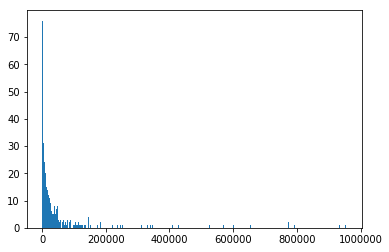

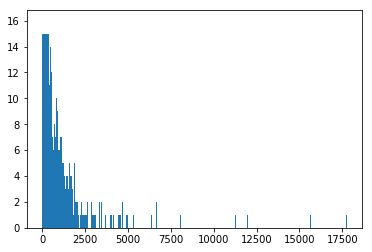

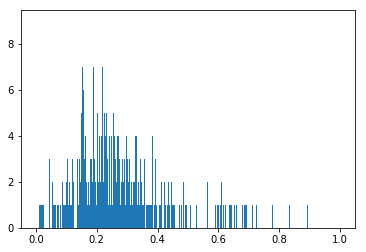

In [26]:
# These  aren't normalized or binned
for i in E_dicts:
    plt.hist(list(i.keys()),len(list(i.values())))
    plt.show()

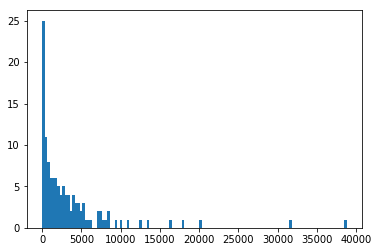

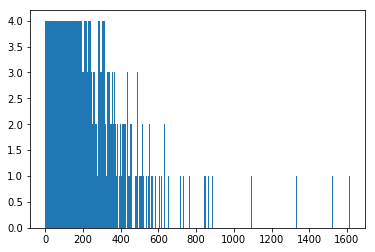

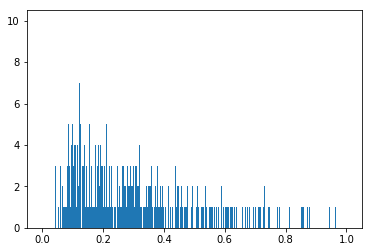

In [27]:
for i in C_dicts:
    plt.hist(list(i.keys()),len(list(i.values())))
    plt.show()

In [28]:
list_names = ["VslistWS","TrilistWS","clistWS"]

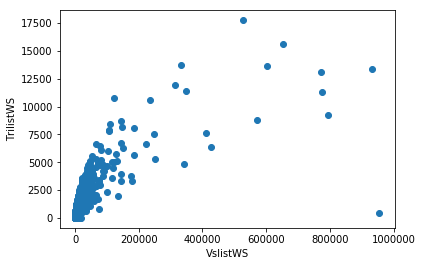

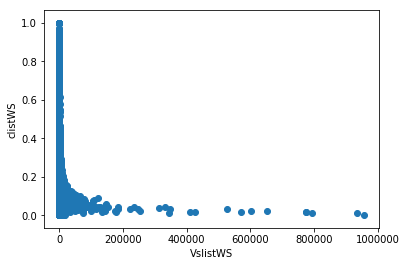

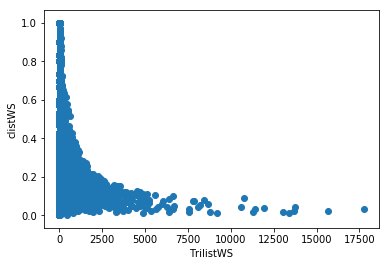

In [29]:
generate_linear_plots(E_lists,list_names)

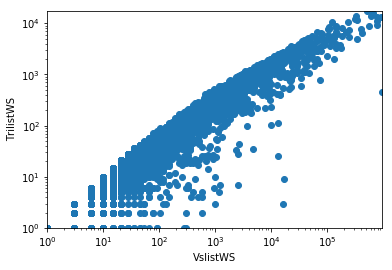

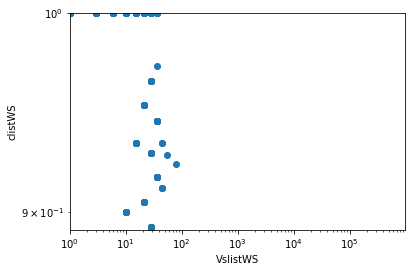

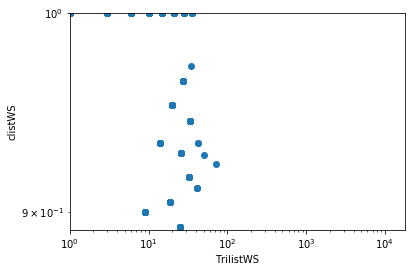

In [33]:
generate_log_plots(E_lists,list_names)

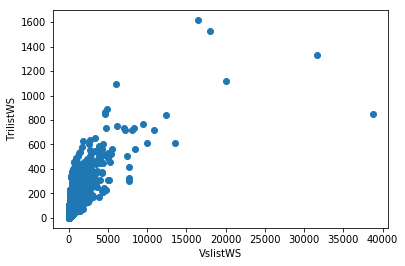

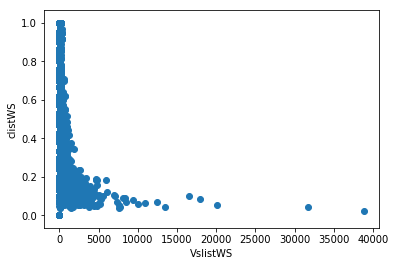

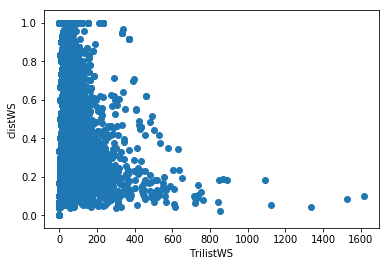

In [31]:
generate_linear_plots(C_lists,list_names)

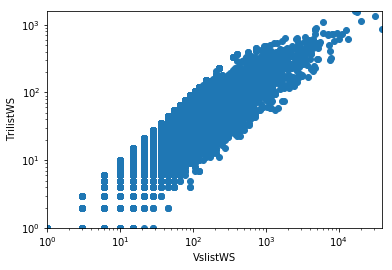

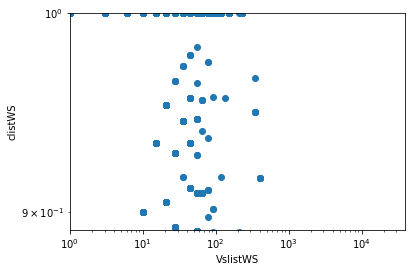

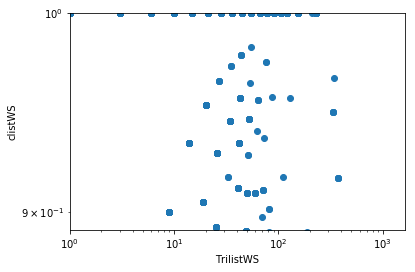

In [32]:
generate_log_plots(C_lists,list_names)

<b>Task 8:</b> Given that m is the number of links in a network of n nodes, write a small equation that provides the number of links that would be changed if a fraction r of the links are modified (such as being rewired) by some algorithm. Hint: it’s really simple... not a trick question.

$$Rewired_{new} = m\cdot r$$
$$Rewired_{swap} = 2m\cdot r$$
<center><br> Given:</center><br>
$$Rewired_{new}: a_{ij} \rightarrow a_{ih}$$
$$Rewired_{swap}: [a_{ij},a_{hk}] \rightarrow [a_{ik}, a_{hj}]$$

Assumption: counts are the actual times link changes occur, rather than a comparison of the beginning and end states. Alternatively, the algorithm could be implemented such that, once a node is changed once, a link is not altered again.